# This code is for generating trajectories using RatInABox: https://github.com/RatInABox-Lab/RatInABox. 

In [3]:
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Section 1: generate running trajectories in the open field

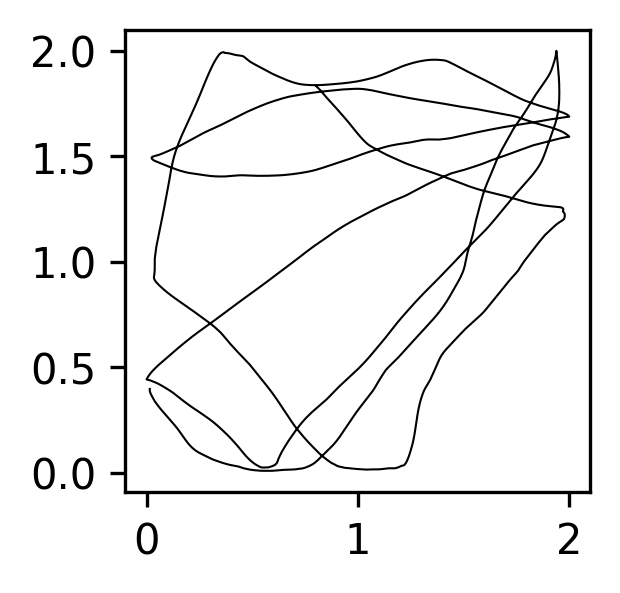

In [5]:
Env = Environment(params={
    'scale':2,
    "dimensionality": "2D",
})

dur = 60 #in seconds
dt = 0.001 #in seconds
speed_mean = 0.3 #in m/s
speed_std = 0.02 #in m/s
rotation_velocity_std = 30 * (np.pi / 180) #in rad/s

Ag = Agent(Env, params = {
    "dt": dt,
    "speed_mean":speed_mean,
    "speed_std": speed_std,
    "rotational_velocity_std": rotation_velocity_std, #set to 120 or 360 will change the tutoriocity of the trajectory
    })

while Ag.t < dur:
    Ag.update(drift_velocity=None,drift_to_random_strength_ratio=1)

# Ag.plot_trajectory()

# print(Ag.rotational_velocity_std)

Position = Ag.history['pos']
Position = np.array(Position)
# Position_2_2pi = Position*(2*np.pi)-np.pi
Vel = Ag.history['vel']
Speed = np.linalg.norm(Vel, axis=1)
# Speed_2_2pi = Speed*(2*np.pi)

plt.figure(figsize=(2,2), dpi=300)
plt.plot(Position[:,0], Position[:,1], linewidth=0.5, color='black')
plt.axis('equal')   

#save Position and Speed as a single npz indicating dur and speed_mean
np.savez('./traces/TwoDtrajectory_dur'+str(dur)+'_speedMean'+str(speed_mean)+'.npz', Position=Position, Speed=Speed, Velocity=Vel, dur=dur)